# Clustering con redes neuronales y su uso en técnicas de muestreo

## Marco teórico
La sociedad siempre se ha preocupado por clasificar diferentes cosas dados ciertos parámetros o criterios, por lo que actualmente existen diferentes técnicas para hacer esto, en particular tenemos a las redes neuronales artificiales, las cuales han cobrado gran relevancia en estos tiempos.

En este proyecto daremos una breve introducción a la estimación de totales usando técnicas de muestreo, en particular, introduciremos el muestreo estratificado usando el estimador Horwitz-Thompson y construiremos los diferentes estratos usando diferentes modelos de redes neuronales para finalmente comparar el rendimiento de éstos, esto es útil, pues realizar estudios en una población es caro, más si la población es muy grande, por lo que buscamos construir estratos que hagan que nuestros estimadores sean precisos y que se tomen en cuenta los diferentes sectores de la población.

## Propósito
Usar una red neuronal para clasificar datos para la creación de estratos en un muestreo estratificado con el estimador Horvitz-Thompson, además veremos si estas técnicas resultan más eficientes que técnicas clasicas de muestreo, principalmente con el muestreo aleatorios simple. Además, usaremos el algoritmo k-means, que es uno de los más populares en el aprendizaje no supervisado, para comparar con nuestro modelo.

## Nociones básicas de muestreo
Definiremos como población de interés al conjunto $U$ y denotaremos a sus elementos como $\{u_1,...,u_N\}$, es decir, $N$ es el tamaño de nuestra población de interés, en este trabajo, haremos referencia a los elementos de $U$ tomando solo los índices, es decir, $U = \{1,...,N\}$.

El principal interés es conocer el valor de una característica de una población finita específica, dicha característica es a lo que llamaremos parámetro, el cual, se calcula a partir de la información que se observa en el conjunto de elementos que conforman la población de interés, por ejemplo, el conjunto de individuos que votan en la elección presidencial. Un problema clásico podría ser el siguiente:


*Parámetro de interés. $\theta:$ Porcentaje de votos válidos a favor del candidato X en la elección presidencial.

*Nuestra población de interés sería $U_A:$ Conjunto de individuos que votan en la elección presidencial y sean
- $N_A:$ Total de individuos que votan.
- $y_k:$ 1 si el individuo $k$ vota a favor del candidato X, 0 en otro caso.
- $z_k:$ 1 si el individuo $k$ emite un voto válido, 0 en otro caso.
y el parámetro de interés de calcular como:
$$\theta = \frac{\sum_{k=1}^{N_A}y_k}{\sum_{k=1}^{N_A}z_k}$$

###  Estimación basada en muestras probabilísticas
Sea $U = \{1,...,N\}$ la población de interés, supongamos que el parámetro poblacional de interés es el total de una variable $y$, es decir
$$\theta = t_y = \sum_{k=1}^{N}y_k.$$
Además cada unidad $u_k$ tiene asociado un valor fijo $y_k$, es decir, el conjunto $\{y_1,...,y_N\}$ también es de tamaño $N$ y consiste de valores fijos. Dado que el parámetro $\theta$ sólo depende de los valores $\{y_1,...,y_N\}$ se dice que la variable $y$ es la variable de interés.

El objetivo es estimar $\theta$, pero usando una muestra. Una muestra es cualquier subconjunto de $U$. Dado que estamos trabajando con poblaciones finitas, notemos que hay $2^{N}$ diferentes subconjuntos de $U$, estos conforman el conjunto potencia, al conjunto potencia de $U$ lo denotaremos por $S$.

Un estimador de $\theta, \widehat{\theta}$, es cualquier función de los valores de $y$ asociados a los elementos en la muestra $s$ seleccionada ($s$ es un elemento del conjunto potencia de $U$):
$$\widehat{\theta} = f(y_k, k\in s)$$
Notar que $\widehat{\theta}$ tomará un valor diferente para cada muestra $s$. Denotemos como $n_s$ al tamaño de la muestra $s$.

###  Diseño muestral
Un diseño muestral es una función $p(.)$ que representa una función de probabilidad sobre $S$ considerando la variable $S'$ que representa la muestra seleccionada, es decir,
$$p(s) = P(S' = s)$$
donde $0 \leq p(s) \leq 1 \,\, \forall s\in S$ y $\sum_{s\in S}p(s) = 1$.

Notamos que con esta definición existe la probabilidad de que existan valores de $S$ cuya probabilidad $p(s) = 0$, por lo que no se podrían observar en la práctica. Definimos $S_0$ el subconjunto de $S$ tal que $0 < p(s)$. A los elementos de $S_0$ se les conoce como el conjunto de muestras posibles y serían las de interés.

El uso de un diseño muestral implicará que tanto el estimador como $n_s$ serán variables aleatorias discretas.

####  Diseño muestral probabilístico 
Un diseño muestral probabilístico es un diseño muestral $p(.)$ que cumple que
$$ \forall u_k \in U\,\, \exists s\in S_0 \,\, t.q. u_k \in s,$$
es decir, cada elemento de la población tiene tiene probabilidad positiva de ser seleccionada en la muestra.

###  Probabilidades de inclusión
Definimos el siguiente evento "Se observa una muestra que contiene al elemento $k$", $k\in U$. Denotemos a este evento como "$k\in S'$". Queremos obtener la probabilidad del evento "$k\in S'$", a esta probabilidad se le conoce como la probabilidad de inclusión del elemento $k$ y se denota como $\pi_k$.

De forma simular se puede obtener la probabilidad de inclusión de los elementos $k$ y $l$, ésta se denota como $\pi_{kl}$. El evento de interés en este caso es "Se observa una muestra que contiene al elemento $k$ y al elemento $l$", a esta probabilidad se le conoce como la probabilidad de inclusión de segundo orden del los elemntos $k,l$ con $k\neq l$, pues en caso contrario, estaríamos hablando de la probabilidad de inclusión del elemento $k$ (con $k = l$).

###  El estimador Horvitz-Thompson para totales
Consideremos que el interés es estimar:
$$\theta = t_y = \sum_{k=1}^{N}y_k$$
Definimos el estimador Horvitz-Thompson como 
$$\widehat{\theta} = \widehat{t}_{y\pi} = \sum_{k\in S'}\frac{y_k}{\pi_k}$$

Donde $S'$ es la muestra observada y $\pi_k$ son las probabilidades de inclusión antes mencionadas.

Se puede probar que este estimador es insesgado para $t_y$, lo cual queda fuera de los límites de este proyecto, por otra parte, la varianza de este estimador está dada por
$$V(\widehat{t}_{y\pi}) =  \sum_{k = 1}^{N}\sum_{l = 1}^{N}\Delta_{kl}\frac{y_k}{\pi_k}\frac{y_l}{\pi_l}$$
donde $\Delta_{kl} = \pi_{kl}- \pi_k \pi_l$

Sin embargo, para calcular la varianza tendríamos que conocer los valores $y_1,...,y_N$, es decir, tenemos que conocer los valores de toda la población de interés, por lo que en la práctica no podremos calcular este valor, por lo que se puede considerar el siguiente estimador
$$\widehat{V}(\widehat{t}_{y\pi}) = \sum_{k\in S'}\sum_{l\in S'}\widehat{\Delta}_{kl}\frac{y_k}{\pi_k}\frac{y_l}{\pi_l}$$
donde $\widehat{\Delta}_{kl} = \frac{\pi_{kl} - \pi_k \pi_l}{\pi_{kl}}$

## Muestreo aleatorio simple sin reemplazo (m.a.s.)
Este diseño de muestreo es el más simple de todos y de los más usados, pues permite la obtención de expresiones sencillas para los estimadores de totales, en particular aquellos basados en el estimador Horvitz-Thompson. 

Considerando una población de tamaño $N$, $U = \{1,...,N\}$, y un valor $n$ fijo, $n\leq N$, el m.a.s. es aquel en donde cada muestra de tamaño $n$, tienen la misma probabilidad de ser seleccionada, es decir,
$$S_0 = \{s_1 = \{1,...,n\},...,s_{N\choose n} = \{N-n+1,...,N\}\},$$
$$p(s_i) = \frac{1}{N\choose n} \,\,\forall s_i \in S_0$$.
Para este diseño se cumple que 
$$\pi_k = \frac{n}{N}$$
y 
$$\pi_{kl} = \frac{n(n-1)}{N(N-1)}, \quad k\neq l,\,k,l\in U.$$
Además se puede verificar que 
$$V(\widehat{t}_{y\pi})  = \frac{N^2}{n}\left( 1 - \frac{n}{N} \right)S_{y_U}^{2},$$
donde $S_{y_U}^{2} = \frac{\sum_{k=1}^{N}(y_k - \overline{y}_U)^{2}}{N-1}$ y $\overline{y}_U = \frac{\sum_{k=1}^{N}y_k}{N}$. También que
$$\widehat{V}(\widehat{t}_{y\pi}) = \frac{N^2}{n}\left( 1 - \frac{n}{N} \right)S_{y_S'}^{2},$$
donde $S_{y_S'}^{2} = \frac{\sum_{k\in S'}(y_k - \overline{y}_S')^{2}}{n-1}$ y $\overline{y}_S' = \frac{\sum_{k\in S'}y_k}{n}$.

##  Diseños muestrales con estratificación
La estratificación es una de las mejores formas de aprovechar información auxiliar para mejorar las estimaciones. 

###  Definición de diseños estratificados
Sea $U=\{1,...,N\}$ la población de interés de tamaño $N$. Supongamos que la población $U$ se particiona en $H$ subconjuntos, denotados como $U_h,\,h=1,...,H$. Estos subconjuntos son llamados estratos y cumplen por definición
$$\bigcup_{h=1}^{H} U_h = U \quad y \quad U_h \bigcap U_m = \emptyset\,\,\forall h\neq m;\,\, h,m = 1,...,H.$$
Se dice que un diseño de muestreo incluye estratificación (muestreo estratificado) si en cada estrato $h$:
* Se selecciona una muestra aleatoria $s_h$ de tamaño $n_{s_h} = n_h$, siguiendo un diseño de muestreo probabilístico $p_h(s_h)$.
* La selección de la muestra de ese estrato se realiza de forma independiente del resto de los estratos.

Es decir, a cada estrato  $U_h$ se le considera como una población por sí mismo y es aquí donde usaremos diversos modelos de redes neuronales para crear dichos estratos dada información extra de los datos.

Notamos que con estas condiciones, la muestra $s$ se obtiene como:
$$s =  \bigcup_{h=1}^{H} s_h,$$
además, $n_s = \sum_{h=1}^{H}n_h$ y dada la independencia en la selección de la muestra entre estratos, se tiene que 
$$P(S' = s) = p(s) = \prod_{h=1}^{H}p_h (s_h).$$
Con esta definición, el diseño de muestreo $p_h(.)$ usado en cada estrato podría ser diferente, para este proyecto usaremos m.a.s. como diseño de muestreo en cada estrato y el estimador Horvitz-Thompson, lo cual nos lleva a lo siguiente

###  El estimador HT en muestreo estratificado
Nuevamente supongamos que que el parámetro poblacional de interés es el total de una variable $y$, es decir,
$\theta = t_y = \sum_{k=1}^{N}y_k.$}

$\textbf{Proposición:}$ En un diseño de muestreo con estratificación, el estimador $HT$ para $\theta$ se puede expresar como:
$$\widehat{t_y}_{\pi} = \sum_{h=1}^{H}\widehat{t_h}_{\pi},$$
donde $\widehat{t_h}_{\pi} = \sum_{k\in S_h}\frac{y_k}{\pi_k}$ es el estimador de $t_h = \sum_{k\in U_h}y_k$.

Además 
$$V(\widehat{t_y}_\pi) = \sum_{h=1}^{H} V_h(\widehat{t_h}_\pi)$$
donde $V_h(\widehat{t_h}_\pi)$ es la varianza de $\widehat{t_h}_\pi$ y un estimador a la varianza sería la siguiente 
$$\widehat{V}(\widehat{t_y}_\pi) = \sum_{h=1}^{H}\widehat{V}_h(\widehat{t_h}_\pi).$$
Nuevamente omitiremos estas pruebas.

$\textbf{Nota:}$ En un diseño de muestreo con estratificación, donde en cada estrato se realiza un muestreo aleatorio simple sin reemplazo, el estimador HT para $\theta = t_y$ se puede expresar como:
$$\widehat{t_y}_\pi = \sum_{h=1}^{H}\widehat{t_h}_\pi$$
Además
$$V(\widehat{t_y}_\pi) = \sum_{h=1}^{H}V_h(\widehat{t_h}_\pi)$$
Entonces, dado un diseño de muestreo con estratificación, si queremos minimizar la varianza del estimador, tenemos que minimizar la varianza del estimador de cada estrato, por lo que los tamaños de muestra cobrarán más relevancia.

## Asignación de muestra
Este problema radica en definir a partir de un tamaño de muestra $n$ dado, el tamaño de la muestra que se le asignará a cada estrato, es decir, definir $n_h$, $h=1,...,H$.
Para nuestro caso, usaremos una asignación proporcional al tamaño de los estratos, la cual queda de la siguiente manera
$$n_h = n\frac{N_h}{N},$$
sin embargo, existen otras opciones más óptimas que requieren mucha más información de los estratos que no siempre se tiene, además, esto nos puede aumentar costos.

### Ejemplo 
Consideremos una población de tamaño $N=4$, $U=\{1,2,3,4\}$. Tres posibles diseños de muestreo de tamaño fijo $n=2$ son:
1. Muestreo aleatorio simple sin reemplazo con $n=2$.
2. Muestreo estratificado con $U_1 = \{1,2\}$ y $U_2= \{3,4\}$. En cada estrato se selecciona una unidad con un aleatorio simple sin reemplazo, es decir $n_h = 1$, $h = 1,2$.
3. Muestreo estratificado con $U_1 = \{1,3\}$ y $U_2= \{2,4\}$. En cada estrato se selecciona una unidad con un aleatorio simple sin reemplazo, es decir $n_h = 1$, $h = 1,2$.

En cada caso de tiene lo siguiente:
1. Hay 6 muestras posibles que son equiprobables: $\{\{1,2\}, \{1,3\}, \{1,4\}, \{2,3\}, \{2,4\}, \{3,4\}\}$, las probabilidades de inclusión de primer orden son $\pi_K = .5, \, k=1,2,3,4$.
2. Hay 4 muestras posibles que son equiprobables: $\{\{1,3\}, \{1,4\}, \{2,3\}, \{2,4\}\}$, las probabilidades de inclusión de primer orden son $\pi_K = .5, \, k=1,2,3,4$.
3. Hay 4 muestras posibles que son equiprobables: $\{\{1,2\}, \{1,4\}, \{3,2\}, \{3,4\}\}$, las probabilidades de inclusión de primer orden son $\pi_K = .5, \, k=1,2,3,4$.

Supongamos que el interés es estimar el total de la variable $y$. Además que
$$\{y_1 = 0, y_2 = 1, y_3 = 0, y_4 = 1\}$$
En este caso $t_y = 2$. Las estimaciones usando el estimador HT para cada muestra posible son 
1. \{2,0,2,2,4,2\}
2. \{0,2,2,4\}
3. \{2,2,2,2\}

Dado que se usa el estimador HT, los estimadores en cada caso son insesgados y solo difieren en la varianza, se tiene que
1. $E(\widehat{t}_{y\pi}) = 2$ y $V(\widehat{t}_{y\pi}) =\frac{4}{3}$
2. $E(\widehat{t}_{y\pi}) = 2$ y $V(\widehat{t}_{y\pi}) = 2$
3. $E(\widehat{t}_{y\pi}) = 2$ y $V(\widehat{t}_{y\pi}) = 0$

En este ejemplo, donde todos los diseños tienen el mismo tamaño de muestra, un diseño estratificado tiene el mejor desempeño, pero otro diseño estratificado tiene el peor. El muestreo aleatorio simple tiene un desempeño intermedio.

Notamos que los elementos al interior de cada estrato (en el tercer diseño) están asociados a valores de $y$ iguales, es decir, la variabilidad de $y$ en cada estrato es baja (cero):
$$U_1 = \{1,3\} \text{  con  } \{y_1 = 0, y_3 = 0\}$$
$$U_2 = \{2,4\} \text{  con  } \{y_2 = 1, y_4 = 1\}$$

Esto nos dice de que si queremos hacer un muestreo estratificado, los estratos deben conformarse por elementos muy parecidos entre sí, por lo que es aquí donde entran las redes neuronales usando aprendizaje no supervisado.

## Listado de supuestos
* Por fines prácticos usaremos una tabla con muestras obtenidas para medir el indice de pobreza; supondremos que dichos datos son los correspondientes a toda la población.
* Supondremos que queremos estimar el promedio del ingreso corriente total per cápita de nuestra población ficticia.
* Usaremos un muestreo estratificado, donde en cada estrato, usaremos un muestreo aleatorio simple sin reemplazo.
* Supondremos que se tiene presupuesto únicamente para recolectar una muestra de tamaño 10,000 
* Consideraremos modelos de redes neuronales que nos clasifiquen los datos en 4, 6 y 8 estratos, por simplicidad

In [1]:
# librerías
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

from sklearn.preprocessing    import StandardScaler
from sklearn_som.som          import SOM
from sklearn.cluster          import KMeans  

## Resultados haciendo un muestreo aleatorio simple sin reemplazo

La página donde se encuentran los datos es la siguiente (en este caso usaremos los del año 2020):

https://www.coneval.org.mx/Medicion/MP/Paginas/Programas_BD_2016-2020.aspx

In [2]:
DatosPobreza = pd.read_csv('pobreza_20.csv')

print(len(DatosPobreza))
DatosPobreza.head()

315619


,folioviv,foliohog,numren,est_dis,upm,factor,tam_loc,rururb,ent,ubica_geo,...,ict,ing_mon,ing_lab,ing_ren,ing_tra,nomon,pago_esp,reg_esp,hli,discap
0,100013605,1,1,2,1,190,1,0,1,1001,...,5338.478315,5338.478315,4502.050071,0.0,836.428244,0.000000,0.0,0.000000,0.0,0.0
1,100013605,1,2,2,1,190,1,0,1,1001,...,5338.478315,5338.478315,4502.050071,0.0,836.428244,0.000000,0.0,0.000000,0.0,0.0
2,100013605,1,3,2,1,190,1,0,1,1001,...,5338.478315,5338.478315,4502.050071,0.0,836.428244,0.000000,0.0,0.000000,0.0,0.0
3,100013606,1,1,2,1,190,1,0,1,1001,...,8126.299401,8093.723435,7558.290403,0.0,535.433032,32.575966,0.0,32.575966,0.0,0.0
4,100013606,1,2,2,1,190,1,0,1,1001,...,8126.299401,8093.723435,7558.290403,0.0,535.433032,32.575966,0.0,32.575966,0.0,0.0


Nuestra cantidad a estimar es la siguiente:

In [3]:
Resultado = DatosPobreza['ictpc'].mean()
Resultado

4379.212450110418

Haciendo 1,000 simulaciones, haremos el histograma de las estimaciones de un muestreo aleatorio simple sin reemplazo para ver como le va a nuestro esimador.

In [4]:
# insertamos las probabilidades de inclusión de primer orden, en este caso es n/N = 10,000/315619
N = 315619
n = 10000
pi_k = 10000/315619
indices = [x for x in range(1,315619)]

estimaciones = np.empty(1000)
# haremos las simulaciones
for i in range(1000):
    estimaciones[i] = DatosPobreza.iloc[np.random.choice(indices, size=n, replace=False)]['ictpc'].sum() * (1/10000)

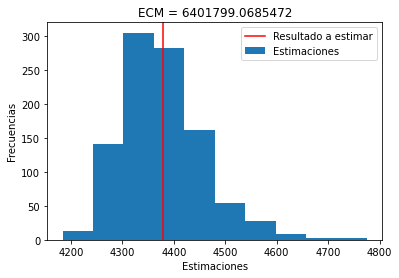

In [5]:
# error cuadrático medio
ECM = ((estimaciones - Resultado)**2).sum()

plt.hist(estimaciones, label='Estimaciones')
plt.axvline(Resultado, c='red', label='Resultado a estimar')
plt.xlabel('Estimaciones')
plt.ylabel('Frecuencias')
plt.title('ECM = ' + str(ECM))
plt.legend()
plt.show()

Dado que se trata de un estimador insesgado, tenemos que el rendimiento no es del todo malo, pues es un diseño muy sencillo, veamos si podemos hacer un mejor trabajo usando redes neuronales.

## Otra consideración
Para poder hacer la creación de los estratos, nos ayudaremos con información auxiliar, aunque los datos contienen una cantidad considerable de columnas, por lo que solo utilizaremos las que consideramos pertinentes, las cuales son: 'ing_lab' que corresponde al ingreso laboral, 'ing_tra' que es el ingreso por transferencias, 'hli' nos indica si la persona es hablante indígena, 'pobreza_e' que es la pobreza extrema y 'pobreza_m' que corresponde a la pobreza moderada, pero antes, agruparemos por ubicación geográfica usando diferentes funciones de agregación.

In [6]:
datosPob_ug = DatosPobreza.groupby(['ubica_geo'])['hli', 'pobreza_e', 'pobreza_m'].agg(np.sum).merge(
        DatosPobreza.groupby(['ubica_geo'])['ing_lab', 'ing_tra'].agg(np.mean), on=['ubica_geo'])

<ipython-input-6-99db6fa2b585>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  datosPob_ug = DatosPobreza.groupby(['ubica_geo'])['hli', 'pobreza_e', 'pobreza_m'].agg(np.sum).merge(
<ipython-input-6-99db6fa2b585>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  DatosPobreza.groupby(['ubica_geo'])['ing_lab', 'ing_tra'].agg(np.mean), on=['ubica_geo'])


In [7]:
display(datosPob_ug.head())

datosPob_ug_train = datosPob_ug.to_numpy()

,hli,pobreza_e,pobreza_m,ing_lab,ing_tra
ubica_geo,,,,,
1001,19.0,126.0,1297.0,15674.262330,2740.231545
1002,0.0,32.0,138.0,12171.053904,2043.792349
1003,0.0,10.0,260.0,10981.434430,3467.231975
1004,0.0,0.0,23.0,10385.684850,5190.287169
1005,1.0,32.0,243.0,17439.723823,1421.674576


Entonces, usaremos los datos de la tabla $\textit{datosPob_ug}$ para construir nuestros estratos para posteriormente, hacer nuestras estimaciones.

## Modelos de redes neuronales
Dado lo extenso que sería este trabajo si consideramos todos y cada uno de los modelos de redes neuronales para clasificar datos usano aprendizaje no supervisado, únicamente consideraremos un modelo en particular: mapas autoorganizados.

### Modelo SOM (Self-Organizing Maps)
Los mapas autoorganizados (SOM) entran en la categoría de las redes neuronales competitivas, las cuales consisten en una capa de neuronas en la que todas reciben la misma entrada, la neurona que presenta la mejor salida (la máxima o la mínima según el criterio) es declarada vencedora. Además este modelo de red neuronal es de los más populares para uso en aprendizaje no supervisado, que es lo que nos interesa para nuestro problema.
#### Arquitectura
Su arquitectura es muy simple, pues solo consta de una capa de entrada de tamaño $N$ (con $N$ igual al número de variables de nuestros datos) y una capa de salida de tamaño $M$ (con $M$ igual al número de estratos que queremos), las conexiones de ambas capas siempre son hacia adelante y las neuronas de entrada están conectadas con cada una de las neuronas de salida mediante pesos $w_{ij}$, de esta manera, cada neurona de salida tendrá asociado un vector de pesos que llamaremos vector de referencia ó codeblock denotaremos por $W_j$.

Entre las neuronas de salida, a pesar de no estar conectadas, se puede decir que existen conexiones laterales de excitación e inhibición implícitas, pues aunque no estén conectadas, cada una de estas neuronas va a tener cierta influencia sobre sus vecinas, esto por pertenecer a la categoría de las redes neuronales competitivas.

#### Algoritmo de aprendizaje
Antes de pasar de lleno al algoritmo, una definición importante es el vecindario al rededor de la neurona vencedora $i*$, la vecindad $N_{i*}$  contiene los íındices de todas las neuronas que están dentro de un radio $d$ de la neurona ganadora $i∗$, es decir:
$$N_{i*} = \{j : d(i*, j) \leq d\}$$
Sea $\alpha$ la tasa de aprendizaje, el algoritmo para actualizar los pesos es el siguiente:
1. Seleccionar la topología de la red para determinar que nodos son adyacentes a otros, en nuestro caso, usaremos una topología rectángular.
2. Fijamos el número de iteraciones (k \geq 500).
3. Inicializar la distancia d y la matriz de pesos W con valores aleatorios pequeños.
4. Se selecciona, para cada dato de entrada $x_i$, el nodo $j$ al cual es más proximo en términos de similitud. Para ello se calcula la distancia euclidea (puede ser cualquier otra medida, en este caso usaremos la distancia euclidiana) del dato $x_i$ a cada uno de los vectores del codebook y se elige aquella neurona a la cual esta distancia sea mínima. A esta neurona $j$ seleccionada, se le conoce como neurona vencedora.
$$ j = argmin_{1\leq j \leq M}\vert\vert x_i - W_j \vert\vert$$
5. Se actualizan los pesos de la neurona vencedora, así como los pesos de las neuronas vecinas 
$$W_i(k + 1) = W_i(k) + \alpha(k)(pi − W_ii(k)), para i\in N_{i*}(d)$$
La tasa de aprendizaje $\alpha$, decrece con el número de iteraciones: $0 < \alpha(k + 1) \leq \alpha(k) \leq  1$.
En la elección de este parámetro suele utilizarse alguna de las siguientes expresiones: $\alpha(k) = \frac{1}{k}$ o bien, $\alpha(k) = \alpha_1 \left(1 - \frac{k}{\alpha_2}\right)$, donde $\alpha_1 = 0.1$ ó $\alpha_2 = 0.2$ y $\alpha_2$ igual a un valor próximo al número de iteraciones.
6. Se repite el proceso a partir del paso 4 hasta completar el número de iteraciones en 2.

In [8]:
# implementación en sklearn

# haremos 4, 6 y 8 grupos
for i in [4, 6, 8]:
    estratos_som = SOM(m=i, n=1, dim=5)
    estratos_som.fit(datosPob_ug_train)
    predicciones = estratos_som.predict(datosPob_ug_train)
    datosPob_ug['predicciones_est' + str(i) ] = predicciones

In [9]:
# unimos los datos, según los conglomerados correspondientes
datosPob_cong = DatosPobreza.merge(datosPob_ug, on='ubica_geo')

In [10]:
datosPob_cong = datosPob_cong[['ictpc', 'hli_y', 'pobreza_e_y', 'pobreza_m_y', 'ing_lab_y', 'ing_tra_y', 'predicciones_est4', 'predicciones_est6', 'predicciones_est8']]

Veamos un diagrama de dispersión del ingreso corriente total per cápita con las diferentes columnas con las que hicimos los estratos

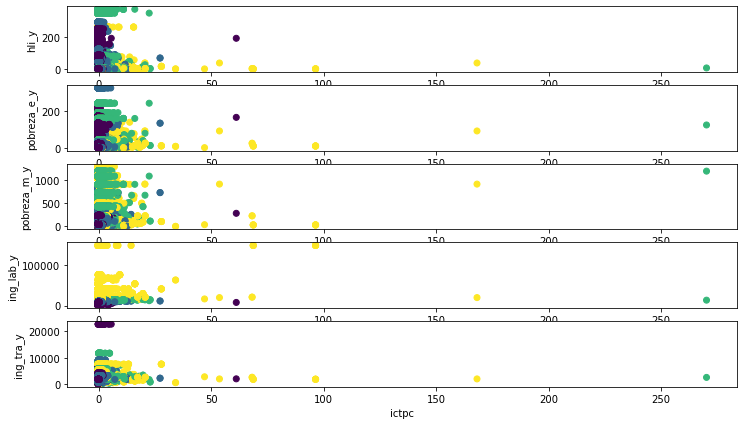

In [11]:
X = datosPob_cong[['ictpc']]
colores = datosPob_cong[['predicciones_est4', 'predicciones_est6', 'predicciones_est8']]
y = datosPob_cong[['hli_y', 'pobreza_e_y', 'pobreza_m_y', 'ing_lab_y', 'ing_tra_y']]
ss    = StandardScaler()
X     = ss.fit_transform(X)

fig, ax = plt.subplots(5, figsize=(12,7))
for i in range(5):
    ax[i].scatter(X,y.iloc[:, i], c = colores.iloc[:, 0])
    ax[i].set_xlabel('ictpc')
    ax[i].set_ylabel(y.columns[i])
plt.show()

Veamos el mismo diagrama pero con los 6 estratos que hizo el algoritmo

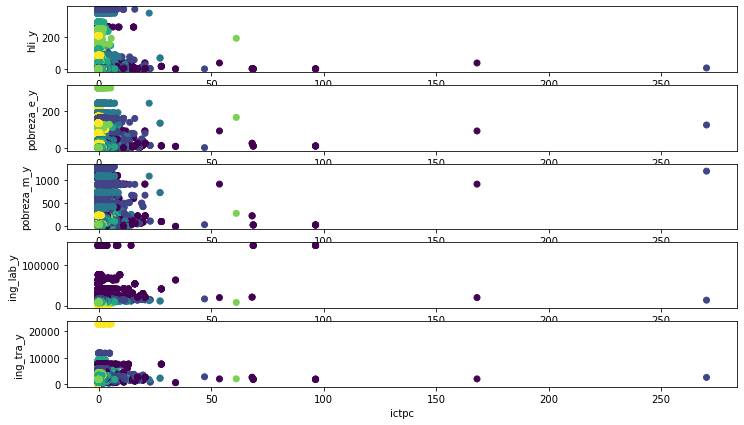

In [12]:
fig, ax = plt.subplots(5, figsize=(12,7))
for i in range(5):
    ax[i].scatter(X,y.iloc[:, i], c = colores.iloc[:, 1])
    ax[i].set_xlabel('ictpc')
    ax[i].set_ylabel(y.columns[i])
plt.show()

Finalmente, con 8 estratos

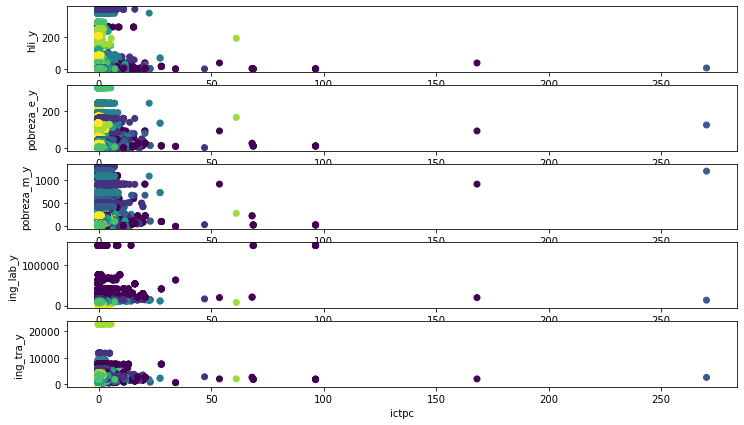

In [13]:
fig, ax = plt.subplots(5, figsize=(12,7))
for i in range(5):
    ax[i].scatter(X,y.iloc[:, i], c = colores.iloc[:, 2])
    ax[i].set_xlabel('ictpc')
    ax[i].set_ylabel(y.columns[i])
plt.show()

De los gráficos anterires, no se alcanza a percibir una gran diferencia salvo en los diagramas de dispersión de 'ictpc' con 'ing_lab_y', pues tenemos que los estratos presentan una división un tanto obvia, que es hacer grupos dependiendo los ingresos laborales de las personas.

Por último, calcularemos los tamaños de muestra por estrato y las respectivas estimaciones.

In [14]:
# calculamos el tamaño de muestra por cada estrato
N_h_4 = np.round(np.array([datosPob_cong[datosPob_cong['predicciones_est4'] == i].shape[0] for i in range(4)]))
n_h_4 = np.round(np.array(n*(N_h_4 / N)))
pi_k_4 = n_h_4 / N_h_4
estimaciones_4 = np.empty(1000)

In [15]:
np.random.seed(42)
for j in range(1000):
    est_estratos = np.array([datosPob_cong[datosPob_cong['predicciones_est4'] == i].iloc[np.random.choice([x for x in range(1, N_h_4[i])],
                                                                                                          size = int(n_h_4[i]), replace = False)]['ictpc'].sum()*(1/pi_k_4[i])
                             for i in range(4)])
    estimaciones_4[j] = est_estratos.sum()*(1/N)

6709711.570710783


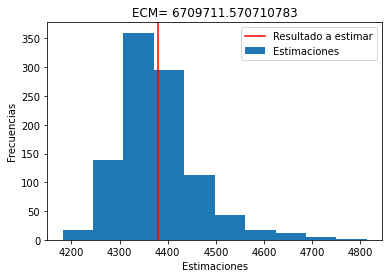

In [16]:
ECM_4 = sum((estimaciones_4-Resultado)**2)
print(ECM_4)
plt.hist(estimaciones_4, label='Estimaciones')
plt.axvline(Resultado, c='red', label='Resultado a estimar')
plt.xlabel('Estimaciones')
plt.ylabel('Frecuencias')
plt.title('ECM= ' + str(ECM_4))
plt.legend()
plt.show()

In [17]:
# para 6 clusters
N_h_6 = np.round(np.array([datosPob_cong[datosPob_cong['predicciones_est6'] == i].shape[0] for i in range(6)]))
n_h_6 = np.round(np.array(n*(N_h_6 / N)))
pi_k_6 = n_h_6 / N_h_6
estimaciones_6 = np.empty(1000)

In [18]:
np.random.seed(42)
for j in range(1000):
    est_estratos = np.array([datosPob_cong[datosPob_cong['predicciones_est6'] == i].iloc[np.random.choice([x for x in range(1, N_h_6[i])],
                                                                                                          size = int(n_h_6[i]), replace = False)]['ictpc'].sum()*(1/pi_k_6[i])
                             for i in range(6)])
    estimaciones_6[j] = est_estratos.sum()*(1/N)

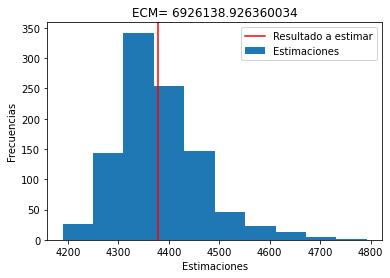

In [19]:
ECM_6 = sum((estimaciones_6-Resultado)**2)
plt.hist(estimaciones_6, label='Estimaciones')
plt.axvline(Resultado, c='red', label='Resultado a estimar')
plt.xlabel('Estimaciones')
plt.ylabel('Frecuencias')
plt.title('ECM= ' + str(ECM_6))
plt.legend()
plt.show()

In [20]:
# para 8 clusters

N_h_8 = np.round(np.array([datosPob_cong[datosPob_cong['predicciones_est8'] == i].shape[0] for i in range(8)]))
n_h_8 = np.round(np.array(n*(N_h_8 / N)))
pi_k_8 = n_h_8 / N_h_8
estimaciones_8 = np.empty(1000)

In [21]:
np.random.seed(42)
for j in range(1000):
    est_estratos = np.array([datosPob_cong[datosPob_cong['predicciones_est8'] == i].iloc[np.random.choice([x for x in range(1, N_h_8[i])],
                                                                                                          size = int(n_h_8[i]), replace = False)]['ictpc'].sum()*(1/pi_k_8[i])
                             for i in range(8)])
    estimaciones_8[j] = est_estratos.sum()*(1/N)

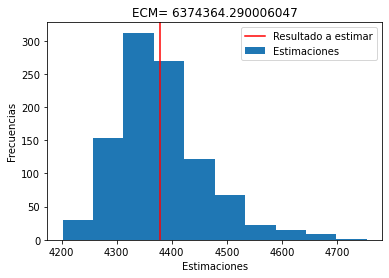

In [22]:
ECM_8 = sum((estimaciones_8-Resultado)**2)
plt.hist(estimaciones_8, label='Estimaciones')
plt.axvline(Resultado, c='red', label='Resultado a estimar')
plt.xlabel('Estimaciones')
plt.ylabel('Frecuencias')
plt.title('ECM= ' + str(ECM_8))
plt.legend()
plt.show()

Por último, veamos el rendimiento del estimador usando el algoritmo 'kmeans' para construir los conglomerados

In [23]:
for i in [4, 6, 8]:
    cong_kmeans = KMeans(n_clusters = i).fit(datosPob_ug_train)
    etiquetas = cong_kmeans.predict(datosPob_ug_train)
    datosPob_ug['kmeans_' + str(i)] = etiquetas 

In [24]:
datosPob_cong = DatosPobreza.merge(datosPob_ug[['kmeans_4', 'kmeans_6', 'kmeans_8']], on='ubica_geo')

In [25]:
# 4 conglomerados
N_h_4_k = np.round(np.array([datosPob_cong[datosPob_cong['kmeans_4'] == i].shape[0] for i in range(4)]))
n_h_4_k = np.round(np.array(n*(N_h_4_k / N)))
pi_k_4_k = n_h_4_k / N_h_4_k
estimaciones_4_k = np.empty(1000)

In [26]:
np.random.seed(42)
for j in range(1000):
    est_estratos = np.array([datosPob_cong[datosPob_cong['kmeans_4'] == i].iloc[np.random.choice([x for x in range(1, N_h_4_k[i])],
                                                                                                          size = int(n_h_4_k[i]), replace = False)]['ictpc'].sum()*(1/pi_k_4_k[i])
                             for i in range(4)])
    estimaciones_4_k[j] = est_estratos.sum()*(1/N)

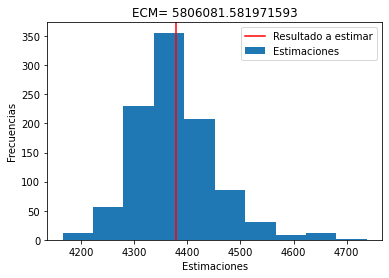

In [27]:
ECM_4_k = sum((estimaciones_4_k-Resultado)**2)
plt.hist(estimaciones_4_k, label='Estimaciones')
plt.axvline(Resultado, c='red', label='Resultado a estimar')
plt.xlabel('Estimaciones')
plt.ylabel('Frecuencias')
plt.title('ECM= ' + str(ECM_4_k))
plt.legend()
plt.show()

In [28]:
# 6 conglomerados
N_h_6_k = np.round(np.array([datosPob_cong[datosPob_cong['kmeans_6'] == i].shape[0] for i in range(6)]))
n_h_6_k = np.round(np.array(n*(N_h_6_k / N)))
pi_k_6_k = n_h_6_k / N_h_6_k
estimaciones_6_k = np.empty(1000)

In [29]:
np.random.seed(42)
for j in range(1000):
    est_estratos = np.array([datosPob_cong[datosPob_cong['kmeans_6'] == i].iloc[np.random.choice([x for x in range(1, N_h_6_k[i])],
                                                                                                          size = int(n_h_6_k[i]), replace = False)]['ictpc'].sum()*(1/pi_k_6_k[i])
                             for i in range(6)])
    estimaciones_6_k[j] = est_estratos.sum()*(1/N)

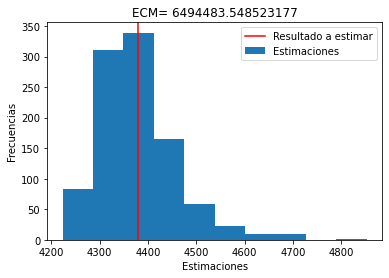

In [30]:
ECM_6_k = sum((estimaciones_6_k-Resultado)**2)
plt.hist(estimaciones_6_k, label='Estimaciones')
plt.axvline(Resultado, c='red', label='Resultado a estimar')
plt.xlabel('Estimaciones')
plt.ylabel('Frecuencias')
plt.title('ECM= ' + str(ECM_6_k))
plt.legend()
plt.show()

In [31]:
# 8 conglomerados
N_h_8_k = np.round(np.array([datosPob_cong[datosPob_cong['kmeans_8'] == i].shape[0] for i in range(8)]))
n_h_8_k = np.round(np.array(n*(N_h_8_k / N)))
pi_k_8_k = n_h_8_k / N_h_8_k
estimaciones_8_k = np.empty(1000)

In [32]:
np.random.seed(42)
for j in range(1000):
    est_estratos = np.array([datosPob_cong[datosPob_cong['kmeans_8'] == i].iloc[np.random.choice([x for x in range(1, N_h_8_k[i])],
                                                                                                          size = int(n_h_8_k[i]), replace = False)]['ictpc'].sum()*(1/pi_k_8_k[i])
                             for i in range(8)])
    estimaciones_8_k[j] = est_estratos.sum()*(1/N)

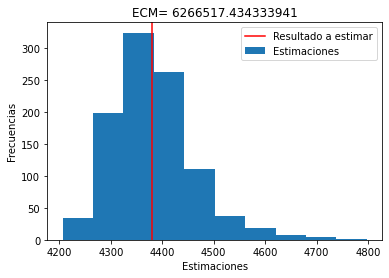

In [33]:
ECM_8_k = sum((estimaciones_8_k-Resultado)**2)
plt.hist(estimaciones_8_k, label='Estimaciones')
plt.axvline(Resultado, c='red', label='Resultado a estimar')
plt.xlabel('Estimaciones')
plt.ylabel('Frecuencias')
plt.title('ECM= ' + str(ECM_8_k))
plt.legend()
plt.show()

## Conclusiones
Notamos que el algoritmo 'kmeans' tiene un mejor desempeño, sin embargo el modelo SOM tampoco es malo, pues nos arrojaba resultados similares que el muestreo aleatorio simple sin reemplazo. 
Por otra parte, es claro que sin el supuesto de que contábamos con los datos de toda la población, no hubiéramos podido hacer las comparaciones pertinentes, por lo que estos métodos en la práctica pueden no resultar del todo útiles, por lo que sería óptimo elegir otro diseño de muestreo, tal como el muestreo por conglomerados ó el muestreo bietápico. Tales opciones no fueron consideradas en este proyecto por simplicidad, pero sería interesante nuevamente comparar estos métodos.